# 7장. 시계열 데이터를 다뤄보자
## 7-1 Numpy의 polyfit으로 회귀(regression) 분석하기
### 관리자 모드로 cmd 실행
- pip install pandas_datareader
- pip install plotly
- conda install -c conda-forge fbprophet

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

In [3]:
from fbprophet import Prophet
from datetime import datetime

In [4]:
pinkwink_web = pd.read_csv('data/07. PinkWink Web Traffic.csv', 
                            encoding='utf-8', thousands=',',
                            names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


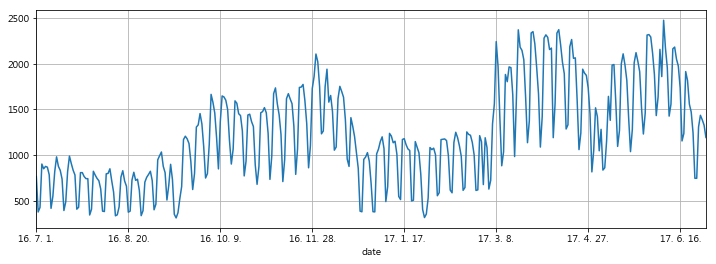

In [5]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True);

In [6]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [7]:
def mse(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [8]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(mse(f1, time, traffic))
print(mse(f2, time, traffic))
print(mse(f3, time, traffic))
print(mse(f15, time, traffic))

430.85973081109637
430.62841018946955
429.53280466762925
330.477730634393


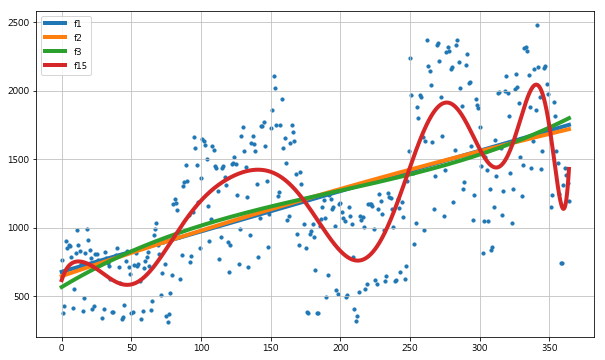

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## 7-2 Prophet 모듈을 이용한 forecast 예측

In [10]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] =  pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [11]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

In [12]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,905.968297,688.019153,1108.659431
421,2017-08-26,490.958897,262.365998,690.819913
422,2017-08-27,623.581075,404.976366,835.045458
423,2017-08-28,1176.248028,963.338690,1392.123459
424,2017-08-29,1212.236815,994.414088,1415.432345


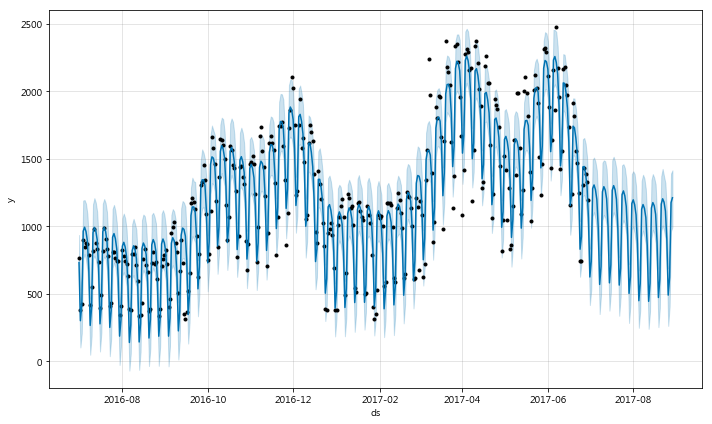

In [14]:
m.plot(forecast);

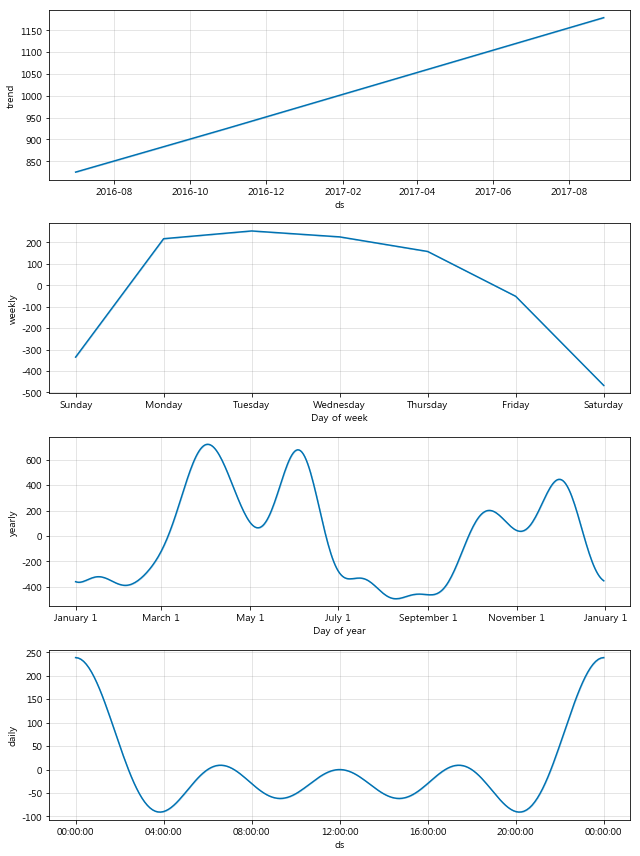

In [15]:
m.plot_components(forecast);